In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

C:\Users\tmachine\AppData\Local\Temp\ipykernel_1868\2002917147.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [7]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)       #60000: This is the number of samples in your training set. Each sample is an image.
                    # 28: This is the height of each image, in pixels.
                    # 28: This is the width of each image, in pixels

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]  # here 0's are the darker region and numbers are the whites of the digits

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

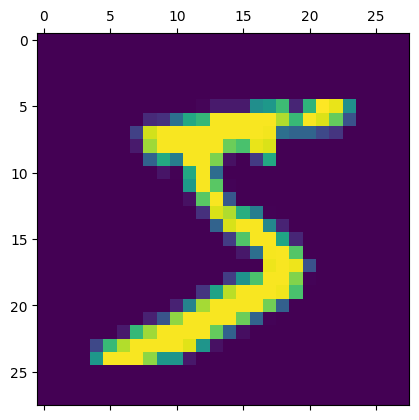

In [11]:
plt.matshow(X_train[0])   #It is a wrapper for imshow(), specifically designed for displaying 2D arrays
                          #It is more generally used and not specifically designed for heatmaps
                          #It gives you more control over aesthetics such as color mapping and aspect ratios
plt.show()

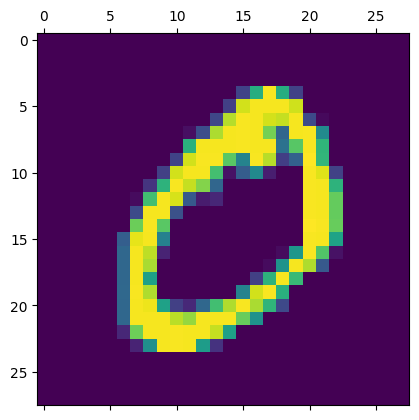

In [12]:
plt.matshow(X_train[1])
plt.show()

In [13]:
y_train[0]      # X_train contains the images and y_train contains the labels 

5

NOW WE ARE GOING TO SCALE OUR DATA FOR MORE ACCURACY

In [18]:
X_train=X_train/255
X_test = X_test/255

NOW WE ARE GOING TO FLATTEN THE THE 28*28 matrix 

In [19]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [20]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
model = keras.Sequential([  #This is used to initialize a linear stack of layers
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')  # “Dense” means that each neuron in this layer is connected to all neurons in the previous layer
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 673us/step - loss: 0.4671 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.3036 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 1s 672us/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 1s 674us/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 1s 657us/step - loss: 0.2666 - accuracy: 0.9259


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 603us/step - loss: 0.2726 - accuracy: 0.9234


[0.27259573340415955, 0.9233999848365784]

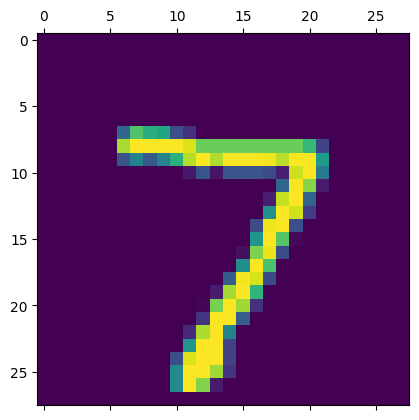

In [26]:
plt.matshow(X_test[0])
plt.show()

In [27]:
y_predict = model.predict(X_test_flattened)
print(y_predict)
print("THE PREDICTED VALUE IS : ",np.argmax(y_predict[0]))

313/313 [==============================] - 0s 553us/step
[[3.0577753e-02 2.9528405e-07 5.5420179e-02 ... 9.9977851e-01
  1.0438613e-01 6.6191810e-01]
 [4.7654721e-01 6.8688532e-03 9.9915165e-01 ... 2.1487872e-12
  2.8432137e-01 3.2772269e-09]
 [4.4470263e-04 9.9215472e-01 6.2734663e-01 ... 1.3789974e-01
  4.1851190e-01 4.3338273e-02]
 ...
 [3.9622564e-06 3.0659869e-06 5.2543078e-04 ... 2.3835243e-01
  5.6624585e-01 7.5613135e-01]
 [1.5018957e-04 1.4512867e-04 7.4240306e-05 ... 6.2051913e-05
  7.0992959e-01 1.2691323e-04]
 [1.2080730e-02 2.8919867e-10 9.0015799e-02 ... 1.6473189e-08
  2.7453082e-04 3.1986389e-07]]
THE PREDICTED VALUE IS :  7


In [29]:
y_predict_label = [np.argmax(i) for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [30]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)

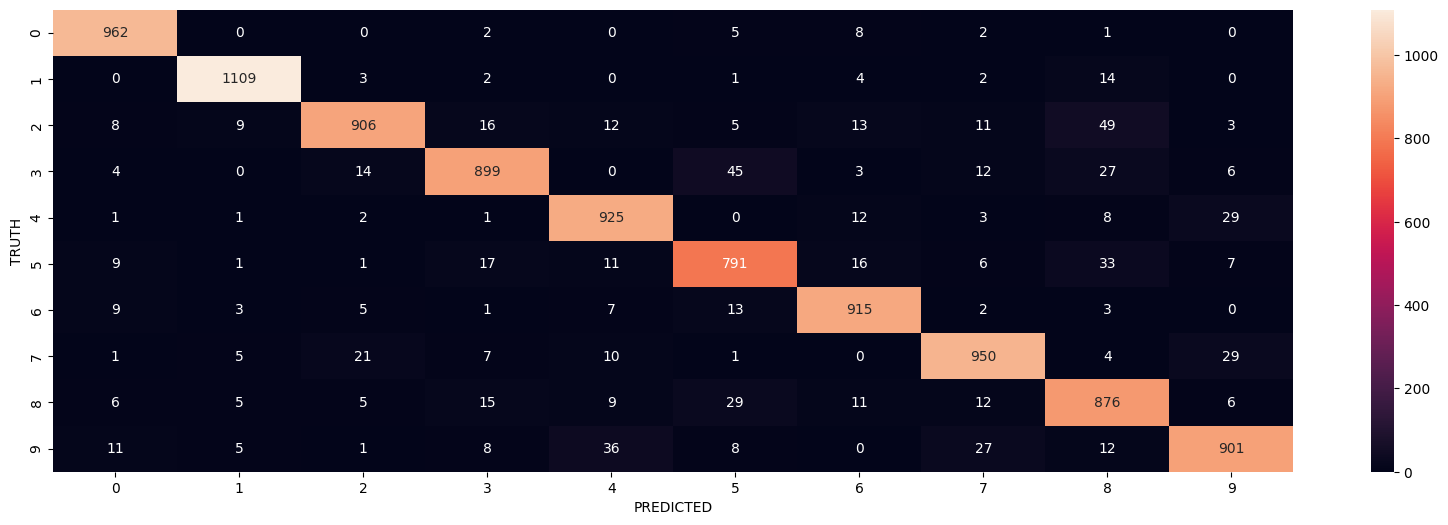

In [33]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')
plt.show()

HERE WE ARE ADDED A HIDDEN LAYER WHICH WILL IMPROVE THE ACCURACY


In [34]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.2734 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.1223 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 2s 978us/step - loss: 0.0849 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.0641 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 2s 991us/step - loss: 0.0494 - accuracy: 0.9840


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 694us/step - loss: 0.0773 - accuracy: 0.9760


[0.07731856405735016, 0.9760000109672546]

In [37]:
y_predict1 = model.predict(X_test_flattened)
y_predict_label1 = [np.argmax(i) for i in y_predict1]
y_predict_label1[0]

313/313 [==============================] - 0s 609us/step


7

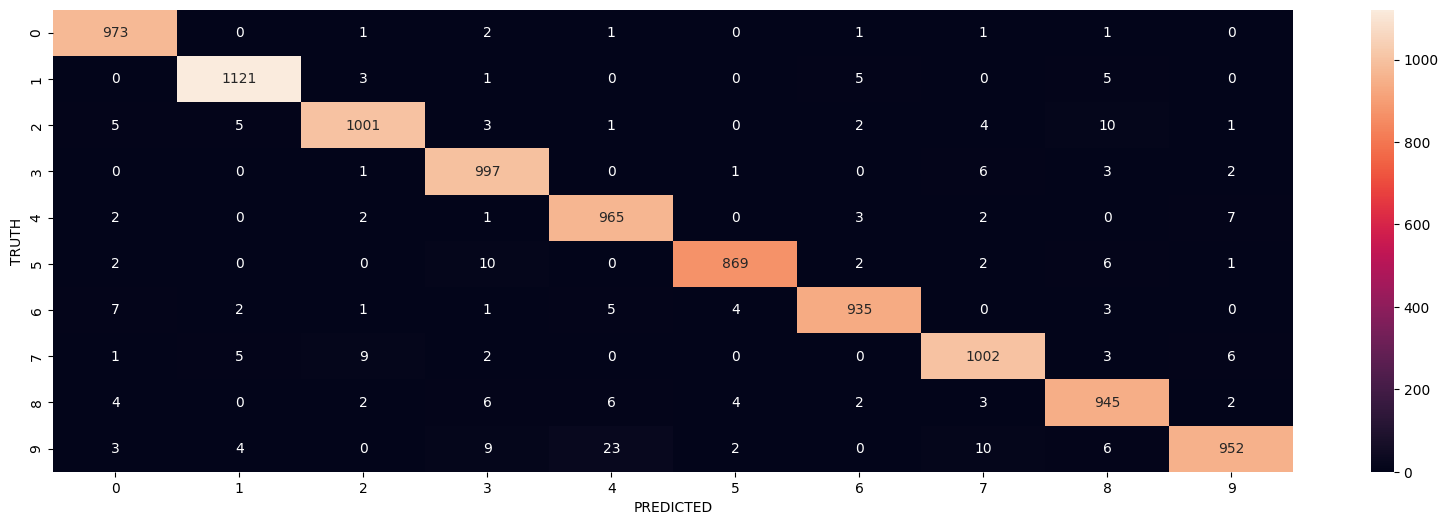

In [39]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label1)
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')
plt.show()

HERE WE ARE GOING TO FLATTEN BY KERAS NOT BY EXPLICITLY

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 957us/step - loss: 0.2728 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.1216 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.0846 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 2s 957us/step - loss: 0.0652 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.0513 - accuracy: 0.9844


In [42]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 735us/step - loss: 0.0766 - accuracy: 0.9769


[0.07656875997781754, 0.9768999814987183]

In [43]:
y_predict2 = model.predict(X_test)
y_predict_label2 = [np.argmax(i) for i in y_predict2]
y_predict_label2[0]

313/313 [==============================] - 0s 622us/step


7

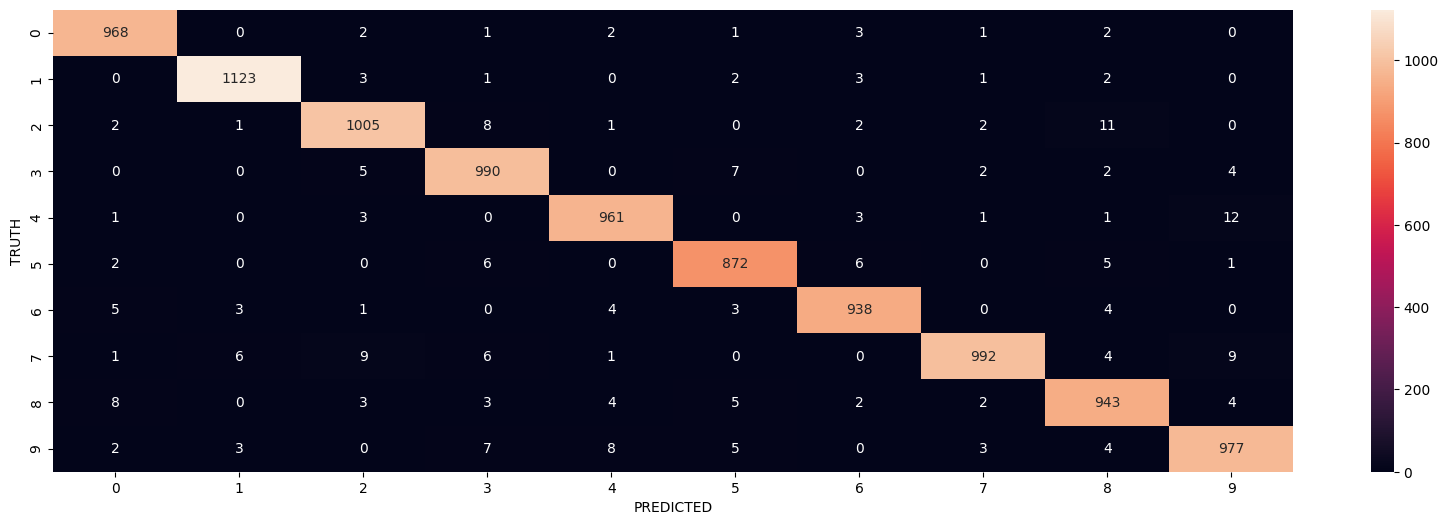

In [44]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label2)
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')
plt.show()